# Part II - (Explanatory Analysis Presentation)
## by (Daizy Asmani)

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook (i.e., an executive summary). This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights listed here should match those documented at the conclusion of the exploratory analysis notebook. 


## Dataset Overview and Executive Summary

> Briefly introduce your dataset here. Include a summary of findings that your visualizations will support.

> **Rubric Tip**: The key insights can be in a bulleted or numbered list for ease of review.

Objective:

> This analysis aims to explain key trends in flight delays and cancellations using clear visualizations and insights. The focus is on:

    - Patterns in departure and arrival delays.
    - Trends in flight cancellations.
    - Seasonal variations and their impact on flight operations.
    - Differences across airlines and airports.

Key Insights:

> Departure vs. Arrival Delays: A strong correlation between departure and arrival delays suggests that initial disruptions significantly impact the entire flight schedule.

> Seasonal Flight Cancellations: Cancellations peak in winter months, indicating weather disruptions as a major factor.

> Airline Comparison: Certain airlines experience higher cancellation rates, possibly due to operational inefficiencies or external factors.

>Airport-Specific Trends: Some major airports have consistently higher delays, affecting overall flight performance.




In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('airline_10y.csv')
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings
0,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,1900-1959,0.0,0.0,135.0,118.0,103.0,1.0,773.0,4,0.0
1,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,2000-2059,0.0,0.0,270.0,250.0,220.0,1.0,1979.0,8,0.0
2,2019,2,6,11,2,2019-06-11,9E,20363,9E,N927XJ,...,2000-2059,0.0,0.0,67.0,60.0,35.0,1.0,192.0,1,0.0
3,2018,1,2,8,4,2018-02-08,WN,19393,WN,N8688J,...,2200-2259,0.0,0.0,140.0,153.0,114.0,1.0,793.0,4,0.0
4,2014,2,4,3,4,2014-04-03,WN,19393,WN,N374SW,...,1300-1359,0.0,0.0,95.0,90.0,77.0,1.0,562.0,3,0.0


## (Visualization 1)- Distribution of Flight Delays

> Write a comment about your visualization here.  Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations shoould be less than 50% of the number of visualizations in the exploratory analysis. Generally 3-5 visualizations suffice.


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots shown are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

Explanation:
- This histogram visualizes the distribution of departure delays (DepDelayMinutes), showing how delays are distributed across flights. Most flights depart on time or with minimal delay, but some experience extreme delays.

In [7]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime',
       'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'DivAirportLandings'],
      

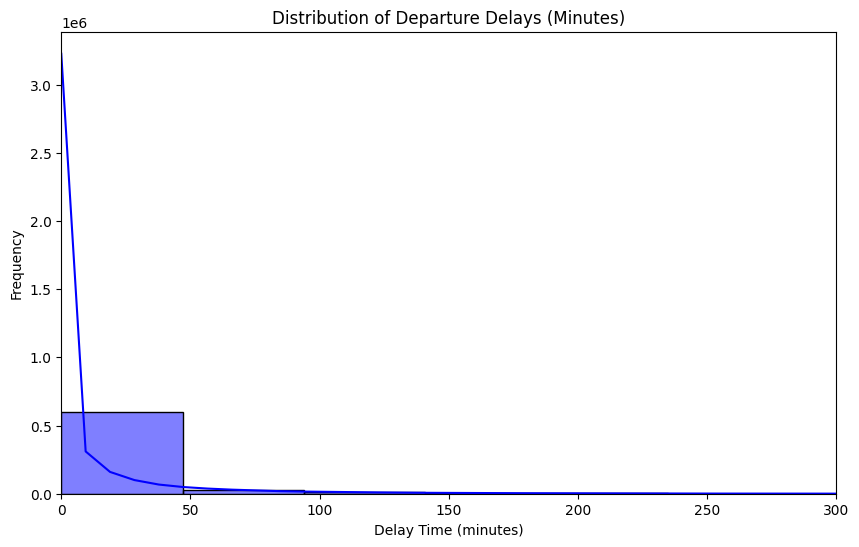

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['DepDelayMinutes'], bins=40, kde=True, color='blue')
plt.title('Distribution of Departure Delays (Minutes)')
plt.xlabel('Delay Time (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 300)  # Focus on most common delays
plt.show()



Key Insight:

- Most flights have minimal departure delays, but some extreme delays exceed 120 minutes, significantly impacting airline performance.

## (Visualization 2) -  Monthly Flight Cancellations

> You should have at least three visualizations in your presentation, but feel free to add more if you'd like!

Explanation:
- This visualization shows the total number of cancellations per month, highlighting seasonal variations.

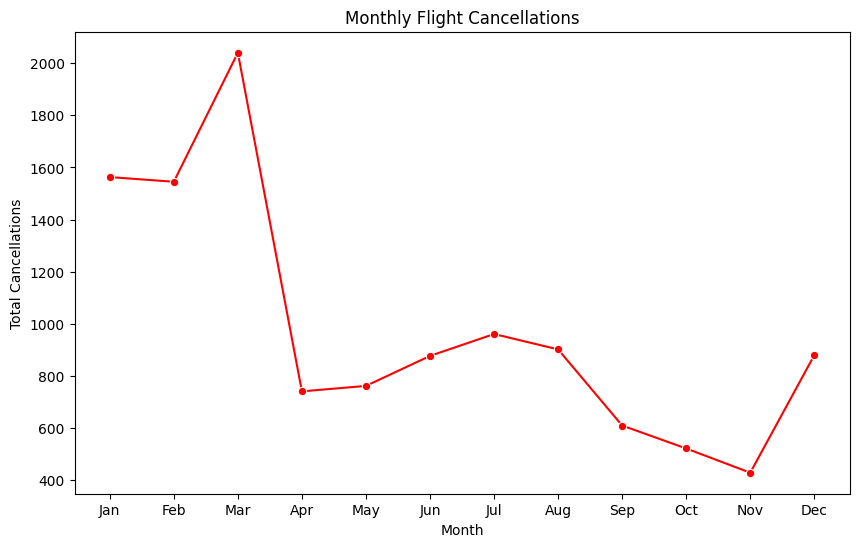

In [17]:
# Convert 'FlightDate' column to datetime format
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract month from FlightDate
df['Month'] = df['FlightDate'].dt.month

# Group by month and sum cancellations
monthly_cancellations = df.groupby('Month')['Cancelled'].sum()

# Plot cancellations over months
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_cancellations.index, y=monthly_cancellations.values, marker='o', color='red')
plt.title('Monthly Flight Cancellations')
plt.xlabel('Month')
plt.ylabel('Total Cancellations')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Key Insight:

- Flight cancellations peak in winter (Jan–Mar), likely due to bad weather.
- Summer months have the lowest cancellation rates.

## (Visualization 3) - Airline-wise Cancellations

> You should have at least three visualizations in your presentation, but feel free to add more if you'd like!

Explanation:
- This bar chart compares cancellations by airline (Reporting_Airline), helping to identify carriers with higher disruption rates.

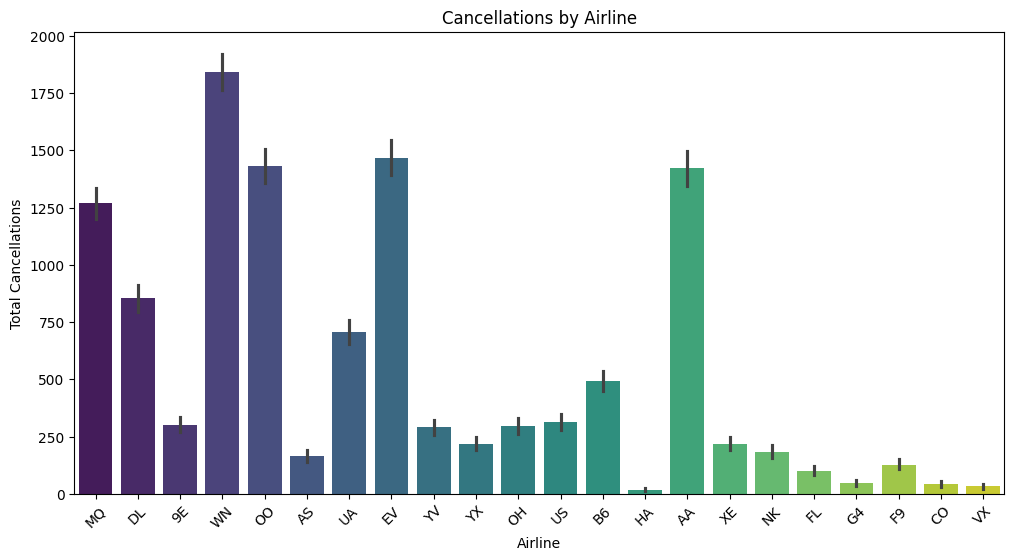

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Reporting_Airline'], y=df['Cancelled'], estimator=sum, palette='viridis')
plt.title('Cancellations by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Cancellations')
plt.xticks(rotation=45)
plt.show()

Key Insight:

- Some airlines have disproportionately higher cancellation rates like WN, OO, EV and AA
- Airlines with lower cancellations may have better contingency planning.

## (Visualization 4) -  Impact of Departure Delays on Arrival Delays


Explanation:
- This scatter plot examines the relationship between departure delays (DepDelayMinutes) and arrival delays (ArrDelayMinutes) to see how late departures affect overall flight schedules.

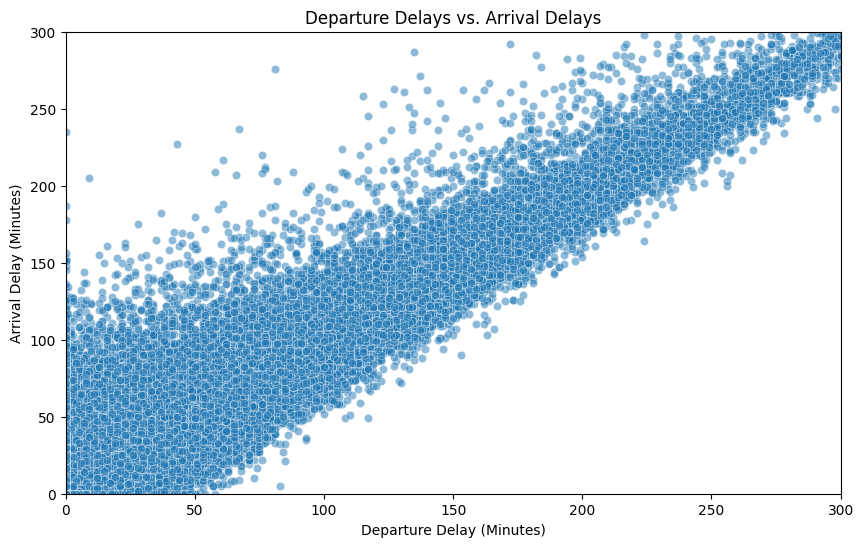

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['DepDelayMinutes'], y=df['ArrDelayMinutes'], alpha=0.5)
plt.title('Departure Delays vs. Arrival Delays')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Arrival Delay (Minutes)')
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.show()


Key Insight:

- There is a strong positive correlation: flights that depart late tend to arrive late.
Delays often compound over time, worsening schedule disruptions.

## (Visualization 4) -  Airport-Specific Delays


Explanation:
- This heatmap shows average departure delays per airport, highlighting airports with chronic delays.

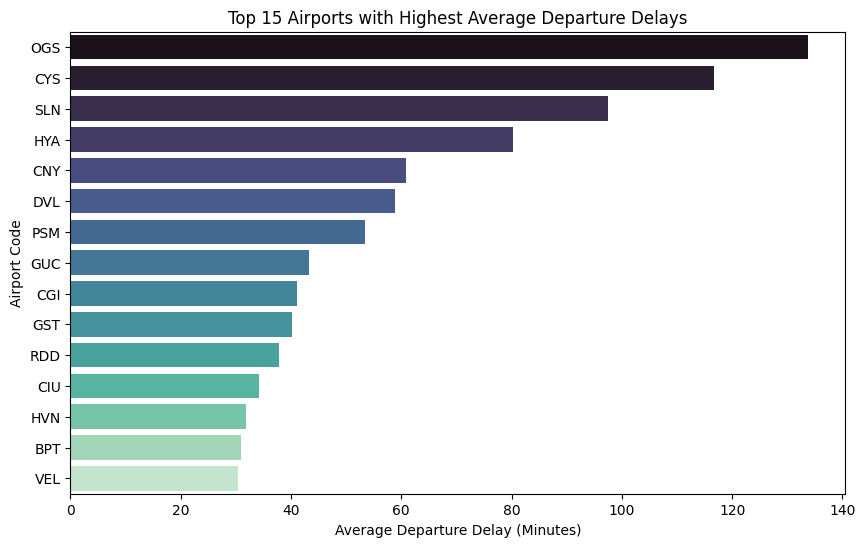

In [24]:
airport_delays = df.groupby('Origin')['DepDelayMinutes'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=airport_delays.index, x=airport_delays.values, palette='mako')
plt.title('Top 15 Airports with Highest Average Departure Delays')
plt.xlabel('Average Departure Delay (Minutes)')
plt.ylabel('Airport Code')
plt.show()

Key Insight:

- Certain airports experience significantly higher delays, potentially due to congestion, weather, or operational inefficiencies.

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
